### `C` Parameter in SVM
- **Role:** Controls the trade-off between maximizing the margin and minimizing classification errors.
- **Impact on Decision Boundary:**
  - **High `C`:** 
    - Prioritizes correct classification of all training examples.
    - Leads to a narrower margin, as the model tries to fit the training data as closely as possible.
    - May result in overfitting, especially with noisy data.
  - **Low `C`:**
    - Allows for some misclassification of training data.
    - Results in a wider margin and a more generalized model.
    - Helps prevent overfitting, but might underfit if set too low.
- **Choosing `C`:**
  - Depends on the dataset and the problem. Cross-validation is often used to find the optimal `C`.

### `Gamma` Parameter in SVM
- **Role:** Defines the influence of a single training example on the decision boundary in non-linear SVM models (used with RBF, Polynomial, and Sigmoid kernels).
- **Impact on Decision Boundary:**
  - **High `Gamma`:**
    - Each point has a high influence, leading to a more complex and tighter decision boundary.
    - The model becomes more sensitive to individual points, which can lead to overfitting.
  - **Low `Gamma`:**
    - Points have a broader influence, leading to a smoother decision boundary.
    - The model becomes more generalized, which can prevent overfitting but might underfit if set too low.
- **Choosing `Gamma`:**
  - Like `C`, `Gamma` is often chosen through cross-validation to find the optimal balance for the specific dataset.


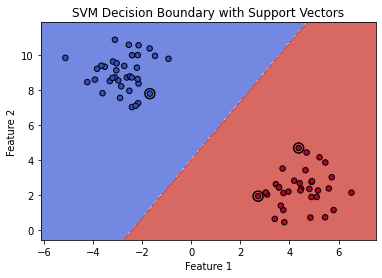

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Generate a synthetic dataset
X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.0)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear', C=1.0)

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict the classification of each point in the mesh grid
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and margins
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.coolwarm, edgecolors='k')

# Plot the support vectors
plt.scatter(svm_classifier.support_vectors_[:, 0], svm_classifier.support_vectors_[:, 1], s=100,
            facecolors='none', edgecolors='k', linewidths=1.5)

# Add labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary with Support Vectors')
plt.show()